In [1]:
%load_ext nb_mypy
%nb_mypy Off

Version 1.0.5


In [3]:
from __future__ import annotations
import numpy as np
import random
import copy

from typing import Tuple, List
from numpy import array, zeros

# from Big_Class import Big_Class  # already imported one NETfuncs is imported
from User_Variables import User_Variables  # already imported one NETfuncs is imported
from Network_Structure import Network_Structure  # already imported one NETfuncs is imported
from Big_Class import Big_Class
from Network_State import Network_State
from Networkx_Net import Networkx_Net
import matrix_functions, functions, statistics, plot_functions, solve

In [4]:
## Parameters

Nin: int = 2
Ninter: int = 0
Nout: int = 3

# learning rate
# alpha_vec = np.array([0.2, 0.5, 1.0, 2.0, 2.5, 2.7, 3.5, 4.0, 8.0])  # 1D array = const alpha, array of arrays = annealed
# alpha_vec = np.array([np.append(np.linspace(4.1,4.8,200), np.linspace(4.8,4.1,200))])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec: np.ndarray = np.array([0.2])  # for allostery, regression and general_reg
# alpha_vec = np.array([0.1])  # for general_reg_allRsChange
# alpha_vec = np.array([np.linspace(5,3.85,40)])  # 1D array for constant alpha, array of arrays for annealed alpha
# alpha_vec = np.array([4.8])
alpha: float = 0.2  # for network combine attempt

# resistance-pressure proportionality factor
gamma: np.ndarray = np.array([1.0])

# R_update: str = 'propto'
R_update = 'deltaR'

# training length
iterations = 460  # number of sampled of p
    
supress_prints: bool = False
bc_noise: float = 0.0
use_p_tag: bool = True
    
M_values: np.ndarray = array([0.4, 0.25, 0.1, 0.15, 0.02, 0.3, 0.35, 0.15])
    
## Networkx sizes
scale: float = 5.0
squish: float = 0.01

In [5]:
## Assign input and output nodes a.f.o lattice size and row choice
input_nodes_arr, inter_nodes_arr, output_nodes_arr, ground_nodes_arr = matrix_functions.build_input_output_and_ground(Nin, Ninter, Nout)

In [6]:
print('input_nodes_arr ', input_nodes_arr)
print('inter_nodes_arr ', inter_nodes_arr)
print('output_nodes_arr ', output_nodes_arr)
print('ground_nodes_arr ', ground_nodes_arr)

input_nodes_arr  [0 1]
inter_nodes_arr  []
output_nodes_arr  [2 3 4]
ground_nodes_arr  [5]


In [7]:
## Variables class - mostly user choices
Variabs = User_Variables(iterations,\
                         Nin, \
                         Nout, \
                         gamma, \
                         R_update, \
                         use_p_tag, \
                         supress_prints, \
                         bc_noise, \
                         Ninter)
Variabs.assign_alpha_vec(alpha)
print('alpha_vec', Variabs.alpha_vec)
Variabs.create_M(M_values)

alpha_vec [0.2 0.2 0.2]


In [8]:
## Big Class containing all classes in Network Simulation
BigClass = Big_Class(Variabs)

In [9]:
## Structure class - build incidence matrices and 1d arrays of edges

Strctr = Network_Structure(input_nodes_arr, \
                           output_nodes_arr, \
                           inter_nodes_arr, \
                           ground_nodes_arr,)
Strctr.build_incidence()
Strctr.build_edges()
BigClass.add_Strctr(Strctr)  # add to big class

In [10]:
## Initiate internal flow network state class

State = Network_State(Nin, Nout)
State.initiate_resistances(BigClass)
BigClass.add_State(State)  # add to big class

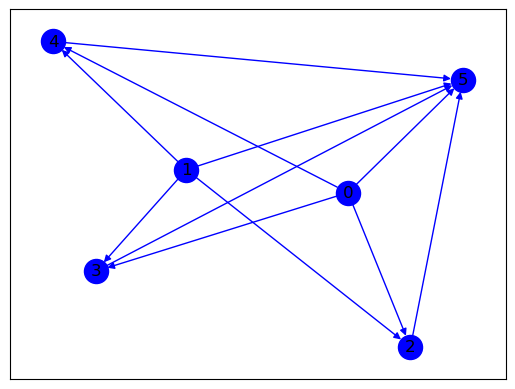

NET is ready


In [11]:
## build network graphics class and plot structure

NET = Networkx_Net(scale, squish)
NET.buildNetwork(BigClass)
NET.build_pos_lattice(BigClass, plot=True, node_labels=True)
BigClass.add_NET(NET)  # add to big class

## Start loop from here

In [12]:
for i in range(Variabs.iterations):
    print('i', i)
    State.draw_p_in_and_desired(Variabs)
    print('p_drawn ', State.input_drawn)
    print('desired output', State.desired)
    State.solve_flow_given_problem(BigClass, "measure")  # measure and don't change resistances
    print('output meausred', State.output)
    if not i % 2:  # even iterations, take another sampled pressure and measure again
        pass
    else:  # odd iterations, go to dual problem and update resistances
        State.calc_loss(BigClass)
        State.update_pressure_dual(BigClass)
        State.update_output_dual(BigClass)
        State.solve_flow_given_problem(BigClass, "dual")  # measure and don't change resistances
        State.update_Rs(BigClass)

i 0
p_drawn  [1.61980252 0.35439913]
desired output [0.73652079 0.21514012 0.13871579]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [0.65806722 0.65806722 0.65806722]
i 1
p_drawn  [0.88034446 0.55271989]
desired output [0.49031775 0.17094243 0.18342285]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
output meausred [0.47768811 0.47768811 0.47768811]
loss= [[ 0.01262964 -0.30674569 -0.29426526]
 [ 0.07845357 -0.4429271  -0.51935143]]
time= 1
input_dual_nxt= [ 0.04369364 -0.01171852]
output_dual_nxt [ 0.00237465 -0.00491286 -0.00812017]
Rs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
R_nxt [1.04131898 1.04860649 1.05181381 0.98590683 0.99319433 0.99640165
 1.04369364 0.98828148 1.00237465 0.99508714 0.99187983]
i 2
p_drawn  [1.70296451 0.59004668]
desired output [0.82869747 0.25880345 0.21107329]
Rs [1.04131898 1.04860649 1.05181381 0.98590683 0.99319433 0.99640165
 1.04369364 0.98828148 1.00237465 0.99508714 0.99187983]
output meausred [0.75157738 0.74798989 0.74640484]
i 3
p_drawn  [0.82634184 0

Rs [2.190868   2.81800857 2.68733214 1.64320702 2.27034759 2.13967116
 2.39636531 1.84870433 1.20549731 0.57835674 0.70903317]
R_nxt [2.19131495 2.8201534  2.68773168 1.64455096 2.27338941 2.14096769
 2.39731389 1.8505499  1.20599894 0.57716049 0.70958221]
i 178
p_drawn  [0.86656235 1.42779608]
desired output [0.70357396 0.30082565 0.44567007]
Rs [2.19131495 2.8201534  2.68773168 1.64455096 2.27338941 2.14096769
 2.39731389 1.8505499  1.20599894 0.57716049 0.70958221]
output meausred [0.6673261  0.37011933 0.44000104]
i 179
p_drawn  [1.46950431 1.65109547]
desired output [1.00057559 0.39461475 0.52471873]
Rs [2.19131495 2.8201534  2.68773168 1.64455096 2.27338941 2.14096769
 2.39731389 1.8505499  1.20599894 0.57716049 0.70958221]
output meausred [0.88433671 0.49359004 0.58616127]
loss= [[ 0.11623888 -0.09897528 -0.06144254]
 [ 0.03624786 -0.06929368  0.00566903]]
time= 90
input_dual_nxt= [0.00202614 0.00075038]
output_dual_nxt [ 0.00347178 -0.00073296 -0.00196181]
Rs [2.19131495 2.8201

Rs [2.22073905 3.00738938 2.82450219 1.57959397 2.36624431 2.18335712
 2.51616662 1.87502155 1.29542757 0.50877724 0.69166442]
output meausred [0.20985804 0.10222697 0.13190056]
i 333
p_drawn  [0.8651553  0.94235518]
desired output [0.58165092 0.22786881 0.30000966]
Rs [2.22073905 3.00738938 2.82450219 1.57959397 2.36624431 2.18335712
 2.51616662 1.87502155 1.29542757 0.50877724 0.69166442]
output meausred [0.53153109 0.25212099 0.32682169]
loss= [[ 0.05011982 -0.02425218 -0.02681203]
 [ 0.07064284 -0.01379242 -0.05771631]]
time= 167
input_dual_nxt= [4.62664122e-06 1.15100164e-05]
output_dual_nxt [-0.00132034 -0.00031357  0.00120478]
Rs [2.22073905 3.00738938 2.82450219 1.57959397 2.36624431 2.18335712
 2.51616662 1.87502155 1.29542757 0.50877724 0.69166442]
R_nxt [2.22206401 3.00770758 2.82330204 1.58092582 2.36656939 2.18216385
 2.51617124 1.87503306 1.29410723 0.50846366 0.6928692 ]
i 334
p_drawn  [1.41969229 1.75412184]
desired output [1.00640737 0.4050875  0.5546304 ]
Rs [2.222064

R theoretical 0.6928674356107919


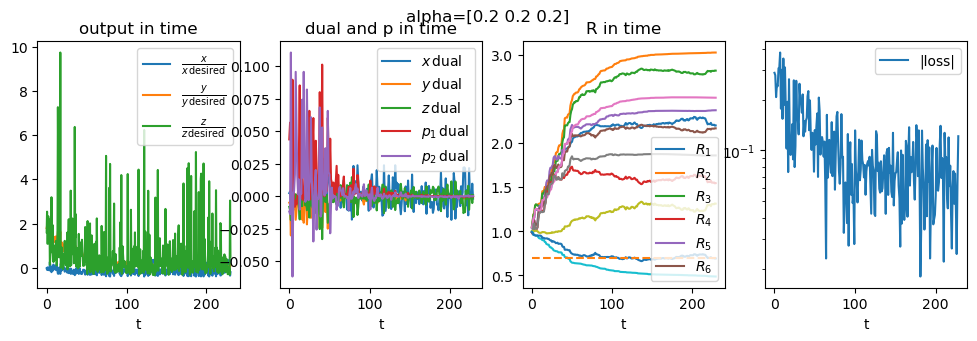

In [13]:
plot_functions.plot_importants(State, Variabs, State.desired_in_t, Variabs.M)